In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

### Importing Dataset

In [2]:
## using cereals1 dataset.
## I later end up using the original dataset 
df_1 = pd.read_csv('Cereals1.csv')
df_1

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [3]:
header_list = df_1.columns[0:-1]
header_list

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups'],
      dtype='object')

In [4]:
##

df = pd.read_table('http://lib.stat.cmu.edu/datasets/1993.expo/cereal' , sep = ' ')
df.columns = header_list
df['rating'] = df_1['rating']
df['shelf'] = df_1['shelf']

## Data Pre-Processing

### Ans 1

In [5]:
## checking datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      76 non-null     object 
 1   mfr       76 non-null     object 
 2   type      76 non-null     object 
 3   calories  76 non-null     int64  
 4   protein   76 non-null     int64  
 5   fat       76 non-null     int64  
 6   sodium    76 non-null     int64  
 7   fiber     76 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     int64  
 10  potass    76 non-null     int64  
 11  vitamins  76 non-null     int64  
 12  shelf     76 non-null     int64  
 13  weight    76 non-null     float64
 14  cups      76 non-null     float64
 15  rating    76 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.6+ KB


In [6]:
num_cols = df.select_dtypes(exclude=['object'])
cat_cols = df.select_dtypes(include=['object'])
num_cols

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,120,3,5,15,2.0,8.0,8,3,135,3,1.0,-1.00,33.983679
1,70,4,1,260,9.0,7.0,5,3,320,3,1.0,0.33,59.425505
2,50,4,0,140,14.0,8.0,0,3,330,3,1.0,0.50,93.704912
3,110,2,2,200,1.0,14.0,8,3,-1,3,1.0,0.75,34.384843
4,110,2,2,180,1.5,10.5,10,1,70,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,110,2,1,250,0.0,21.0,3,3,60,3,1.0,0.75,39.106174
72,110,1,1,140,0.0,13.0,12,2,25,2,1.0,1.00,27.753301
73,100,3,1,230,3.0,17.0,3,1,115,1,1.0,0.67,49.787445
74,100,3,1,200,3.0,17.0,3,1,110,1,1.0,1.00,51.592193


In [7]:
## 5 number summary
num_cols_sum = num_cols.describe()['min':'max']
num_cols_sum

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
min,50.0,1.0,0.0,0.0,0.00,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0000,18.042851
25%,100.0,2.0,0.0,132.5,0.75,12.0,3.0,1.0,40.0,1.0,1.0,0.6275,32.932466
50%,110.0,2.5,1.0,180.0,1.75,14.5,7.0,2.0,90.0,2.0,1.0,0.7500,40.253086
75%,110.0,3.0,2.0,212.5,3.00,17.0,11.0,3.0,120.0,3.0,1.0,1.0000,50.780847
max,160.0,6.0,5.0,320.0,14.00,23.0,15.0,3.0,330.0,3.0,1.5,1.5000,93.704912


<AxesSubplot:>

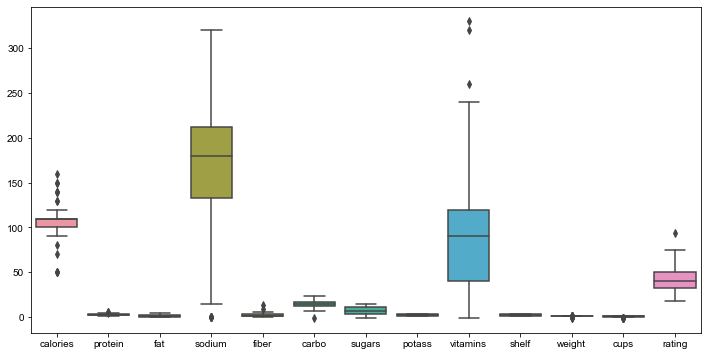

In [8]:
### visualizing numerical columns
fig, ax = plt.subplots(figsize=(12,6))
sns.set_style("darkgrid")
sns.boxplot(data = num_cols)

### Ans 2

In [9]:
## check for NaN values
num_cols.isna().sum()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [10]:
## we do not have any immediate missing values
## what about -1?
num_cols[num_cols == -1].sum()

calories    0.0
protein     0.0
fat         0.0
sodium      0.0
fiber       0.0
carbo      -1.0
sugars     -1.0
potass      0.0
vitamins   -2.0
shelf       0.0
weight     -2.0
cups       -9.0
rating      0.0
dtype: float64

In [11]:
## 5 columns have missing values, let us replace them with the mean
df.loc[num_cols['carbo'] == -1,'carbo'] = num_cols['carbo'].mean()
df.loc[num_cols['sugars'] == -1,'sugars'] = num_cols['sugars'].mean()
df.loc[num_cols['vitamins'] == -1,'vitamins'] = num_cols['vitamins'].mean()
df.loc[num_cols['weight'] == -1,'weight'] = num_cols['weight'].mean()
df.loc[num_cols['cups'] == -1,'cups'] = num_cols['cups'].mean()

In [12]:
num_cols = df.select_dtypes(exclude=['object'])

### Ans 3

In [13]:
num_cols_sum = num_cols.describe()['min':'max']
num_cols_sum

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
min,50.0,1.0,0.0,0.0,0.00,7.000000,0.0,1.0,15.00,1.0,0.5,0.250000,18.042851
25%,100.0,2.0,0.0,132.5,0.75,12.000000,3.0,1.0,43.75,1.0,1.0,0.650164,32.932466
50%,110.0,2.5,1.0,180.0,1.75,14.861842,7.0,2.0,90.00,2.0,1.0,0.750000,40.253086
75%,110.0,3.0,2.0,212.5,3.00,17.000000,11.0,3.0,120.00,3.0,1.0,1.000000,50.780847
max,160.0,6.0,5.0,320.0,14.00,23.000000,15.0,3.0,330.00,3.0,1.5,1.500000,93.704912


<AxesSubplot:>

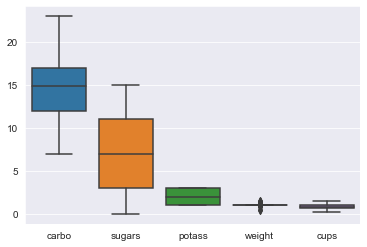

In [14]:
sns.set_style("darkgrid")
sns.boxplot(data = num_cols[['carbo','sugars','potass','weight','cups']])

array([[<AxesSubplot:title={'center':'carbo'}>,
        <AxesSubplot:title={'center':'sugars'}>],
       [<AxesSubplot:title={'center':'potass'}>,
        <AxesSubplot:title={'center':'weight'}>],
       [<AxesSubplot:title={'center':'cups'}>, <AxesSubplot:>]],
      dtype=object)

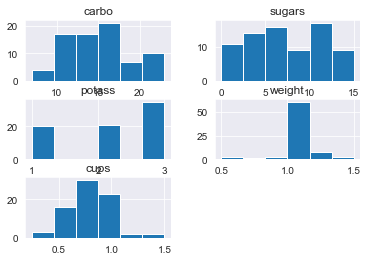

In [15]:
num_cols[['carbo','sugars','potass','weight','cups']].hist(bins = 6)

In [16]:
skewness = num_cols.skew()
skewness[['carbo','sugars','potass','weight','cups']]

carbo     0.270327
sugars    0.036018
potass   -0.388492
weight    0.310534
cups      0.410757
dtype: float64

### Replacement  
We observe an acceptable amount of skewness in all our columns (< 0.5).  
Hence, we can conclude that replacing missing values was a good idea in the above cases.  

### Ans 4

<AxesSubplot:>

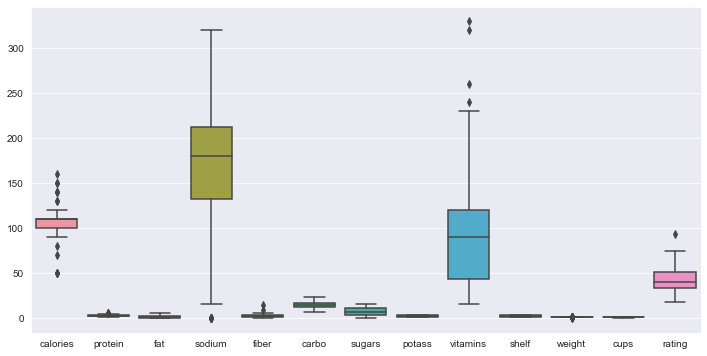

In [17]:
## first of all, we must observe noisy data
fig, ax = plt.subplots(figsize=(12,6))
sns.set_style("darkgrid")
sns.boxplot(data = num_cols)

In [18]:
## We find quite a few outliers in the data. 
## It would be apporpriate to remove outliers 

## Anything above or below 1.5 times quartiles 1 and 3 respectively
## is an outlier.

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)

In [19]:
temp = num_cols.copy()
for feature in num_cols.columns:
    temp.loc[(temp[feature] > upper_whisker[feature]) | (temp[feature] < lower_whisker[feature]), [feature]] = temp[feature].median()

<AxesSubplot:>

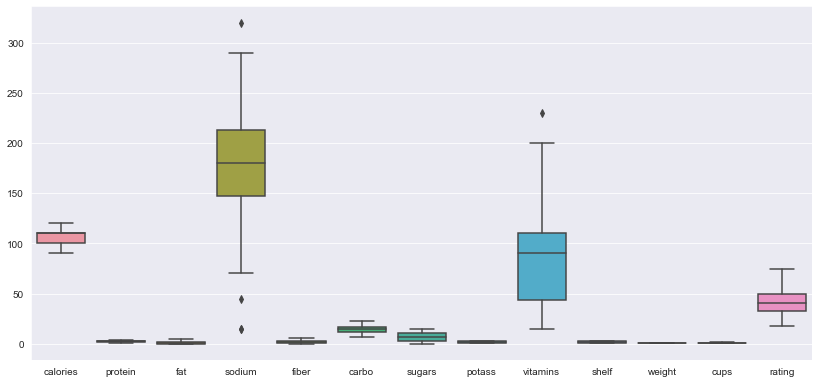

In [20]:
num_cols_processed = temp
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(14,6.5))
sns.boxplot(data=num_cols_processed)

### SUCCESS!  
We have now removed majority of outliers and replaced them with median.  


### Ans 5

In [21]:
num_cols_processed.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.0,76.000000,76.000000
mean,107.236842,2.401316,1.013158,181.381579,1.792105,14.930575,7.038608,2.197368,85.754155,2.197368,1.0,0.779025,41.623743
std,8.099166,0.875670,1.013159,60.186370,1.520220,3.737575,4.377048,0.832982,48.049515,0.832982,0.0,0.228913,12.464724
min,90.000000,1.000000,0.000000,15.000000,0.000000,7.000000,0.000000,1.000000,15.000000,1.000000,1.0,0.250000,18.042851
25%,100.000000,2.000000,0.000000,147.500000,0.750000,12.000000,3.000000,1.000000,43.750000,1.000000,1.0,0.650164,32.932466
50%,110.000000,2.250000,1.000000,180.000000,1.625000,14.861842,7.000000,2.000000,90.000000,2.000000,1.0,0.750000,40.179526
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,3.000000,110.000000,3.000000,1.0,1.000000,50.031833
max,120.000000,4.000000,5.000000,320.000000,6.000000,23.000000,15.000000,3.000000,230.000000,3.000000,1.0,1.500000,74.472949


In [22]:
num_cols.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.526316,1.013158,160.065789,2.048684,14.930575,7.038608,2.197368,96.148892,2.197368,1.029404,0.779025,42.327057
std,19.139378,1.089020,1.013159,84.318813,2.219038,3.737575,4.377048,0.832982,66.688658,0.832982,0.151601,0.228913,13.820602
min,50.000000,1.000000,0.000000,0.000000,0.000000,7.000000,0.000000,1.000000,15.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,1.000000,43.750000,1.000000,1.000000,0.650164,32.932466
50%,110.000000,2.500000,1.000000,180.000000,1.750000,14.861842,7.000000,2.000000,90.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,3.000000,120.000000,3.000000,1.000000,1.000000,50.780847
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,3.000000,330.000000,3.000000,1.500000,1.500000,93.704912


### Success  
We successfully removed most of the outliers from our dataset.  
Most Numeric columns see a reduction in the number of outliers.  
The min,max range has decreased.  
But the quantiles remain roughly the same.  


### Merging Datasets  
now, we need to merge our pre-processed data sets.  
We did not make any changes to cat_cols and all changes made in num_cols are stored and represented in  
num_cols_processed

In [23]:
df_processed = df.copy()
df_processed[num_cols.columns] = num_cols_processed

### Ans 6

In [24]:
df_processed

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3.0,5,15,2.00,8.0,8.0,3,135.000000,3,1.0,0.590658,33.983679
1,All-Bran,K,C,110,4.0,1,260,1.75,7.0,5.0,3,90.000000,3,1.0,0.330000,59.425505
2,All-Bran_with_Extra_Fiber,K,C,110,4.0,0,140,1.75,8.0,0.0,3,90.000000,3,1.0,0.500000,40.253086
3,Almond_Delight,R,C,110,2.0,2,200,1.00,14.0,8.0,3,93.657895,3,1.0,0.750000,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2.0,2,180,1.50,10.5,10.0,1,70.000000,1,1.0,0.750000,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2.0,1,250,0.00,21.0,3.0,3,60.000000,3,1.0,0.750000,39.106174
72,Trix,G,C,110,1.0,1,140,0.00,13.0,12.0,2,25.000000,2,1.0,1.000000,27.753301
73,Wheat_Chex,R,C,100,3.0,1,230,3.00,17.0,3.0,1,115.000000,1,1.0,0.670000,49.787445
74,Wheaties,G,C,100,3.0,1,200,3.00,17.0,3.0,1,110.000000,1,1.0,1.000000,51.592193


In [25]:
## giving meaningful names
df_processed.loc[df_processed['type'] == 'C','type'] = 'Cold'
df_processed.loc[df_processed['type'] == 'H','type'] = 'Hot'
df_processed.loc[df_processed['mfr'] == 'G','mfr'] = 'GeneralMills'
df_processed.loc[df_processed['mfr'] == 'K','mfr'] = 'Kelloggs'
df_processed.loc[df_processed['mfr'] == 'A','mfr'] = 'AHFP'
df_processed.loc[df_processed['mfr'] == 'N','mfr'] = 'Nabisco'
df_processed.loc[df_processed['mfr'] == 'P','mfr'] = 'Post'
df_processed.loc[df_processed['mfr'] == 'Q','mfr'] = 'Quaker'
df_processed.loc[df_processed['mfr'] == 'R','mfr'] = 'RalstonPurina'

In [26]:
## creating crosstab
pd.crosstab(df_processed['mfr'],df_processed['type'],rownames=['Manufacturer'])

type,Cold,Hot
Manufacturer,,
AHFP,0,1
GeneralMills,22,0
Kelloggs,23,0
Nabisco,4,1
Post,9,0
Quaker,7,1
RalstonPurina,8,0


### Ans 7

In [27]:
sort_rating = df_processed.sort_values(by=['rating'],ascending=False,ignore_index=True)[['name','rating']]
print("Highest Rated Cereal is: %s" % sort_rating.loc[0,'name'])
print("Lowest Rated Cereal is: %s" % sort_rating.loc[sort_rating.shape[0]-1,'name'])

Highest Rated Cereal is: Shredded_Wheat_'n'Bran
Lowest Rated Cereal is: Cap'n'Crunch


### Ans 8

<AxesSubplot:xlabel='type', ylabel='rating'>

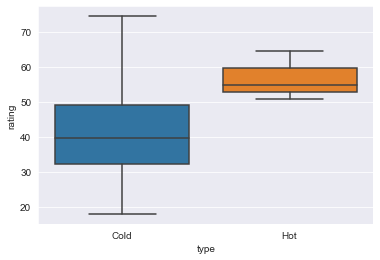

In [28]:
sns.set_style("darkgrid")
sns.boxplot(x='type',y='rating',data=df_processed)

In [29]:
print("Cold", df_processed.loc[df_processed['type'] == 'Cold','rating'].median())
print("Hot ", df_processed.loc[df_processed['type'] == 'Hot','rating'].median())

Cold 39.7034
Hot  54.850917


## Conclusion  
Hot Cereals tend to be rated much higher than Cold Cereals

### Ans 9

<AxesSubplot:>

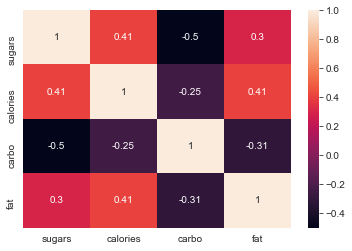

In [30]:
temp = df_processed[['sugars', 'calories', 'carbo','fat']]
corr = temp.corr()
sns.heatmap(data=corr, annot=True)

## BAM!
No multi-collinearity is present between our data.  
Most of our variables are observed to be mildly correlated.  
Since pearson's correlation is a linear correlation, we must analyze the data further.  
This suggests that manufacturers prefer to optimize their cereals for specific nutrients rather than providing a wholemeal.  

### Ans 10

In [31]:
## Since our columns were slightly skewed
## We can use the 'mean' of our sample to find the central tendency of our sample.

calories = df_processed.groupby('mfr')['calories'].describe()['mean']
calories = calories.sort_values()
calories

mfr
Nabisco           96.000000
AHFP             100.000000
RalstonPurina    105.000000
GeneralMills     108.181818
Kelloggs         108.260870
Post             108.888889
Quaker           110.000000
Name: mean, dtype: float64

In [32]:
## display complete pivot table 

pd.set_option('display.max_rows', 500)
pd.pivot_table(data=df_processed,index=['mfr','name'])['calories']

mfr            name                                  
AHFP           Maypo                                     100
GeneralMills   Apple_Cinnamon_Cheerios                   110
               Basic_4                                   110
               Cheerios                                  110
               Cinnamon_Toast_Crunch                     120
               Clusters                                  110
               Cocoa_Puffs                               110
               Count_Chocula                             110
               Crispy_Wheat_&_Raisins                    100
               Golden_Grahams                            110
               Honey_Nut_Cheerios                        110
               Kix                                       110
               Lucky_Charms                              110
               Multi-Grain_Cheerios                      100
               Oatmeal_Raisin_Crisp                      110
               Raisin_Nut_Bran 

## Flaw in data
The calories mentioned are for one full serving size, but instead, we should 
actually aim to get calories per gram of one serving.  
Let us create a new column

In [33]:
## create new column with calories per serving
df_processed['CaloriesPerCup'] = df_processed['calories']*df_processed['cups']
calories = df_processed.groupby('mfr')['CaloriesPerCup'].describe()['mean']
calories = calories.sort_values()
calories

mfr
AHFP             59.065789
Nabisco          67.746316
Post             77.000000
Quaker           79.981414
RalstonPurina    81.130592
Kelloggs         82.397025
GeneralMills     94.659091
Name: mean, dtype: float64

## New Calculations.
New calculations show that on average, AHFP Serials contain the least amount of calories per serving.

### Ans 11

In [34]:
## Let us first check our variables
## How many discrete values does 'calories' have?
df_processed['calories'].nunique()

4

## Visualising
Since calories only has 4 discrete values,  
Calories is a discrete variable but  
Rating is a continuous variable.  
  
  Hence, it is best to use a strip plot

<AxesSubplot:xlabel='calories', ylabel='rating'>

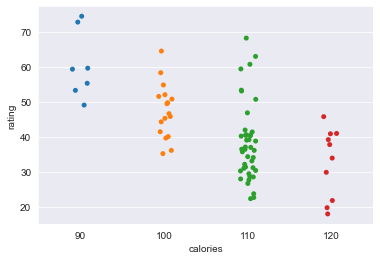

In [35]:
sns.stripplot(data=df_processed, x = 'calories', y = 'rating')

## Trend
A very clear trend where cereals with lower calories tend to be rated higher

In [36]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency

In [37]:
corr, _ = pearsonr(df_processed['calories'],df_processed['rating'])
print('Pearsons correlation between calories and rating: %.4f' % corr)

Pearsons correlation between calories and rating: -0.5969


In [38]:
corr, _ = spearmanr(df_processed['calories'],df_processed['rating'])
print('Spearmans correlation between calories and rating: %.4f' % corr)

Spearmans correlation between calories and rating: -0.5590


stat, p, dof, expected = chi2_contingency(df_processed[['calories','rating']])
print("p value is " + str(p))
alpha  = 0.05
if p <= alpha:
    print('Dependent Variables')
else:
    print('Independent Variables')

## Conclusion 
From both spearman and pearsons correlation test, it is evident that calories and rating are moderately correlated.  

### Ans 12

In [39]:
df_processed['shelf'].nunique()

3

<AxesSubplot:xlabel='shelf', ylabel='rating'>

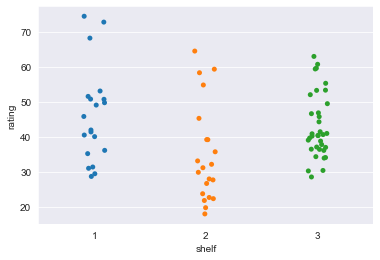

In [40]:
sns.stripplot(data=df_processed, x = 'shelf', y = 'rating')

<AxesSubplot:xlabel='shelf', ylabel='rating'>

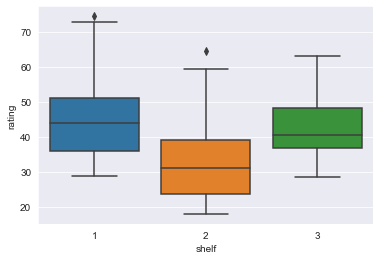

In [41]:
sns.boxplot(data=df_processed, x = 'shelf', y = 'rating')

In [42]:
corr, _ = pearsonr(df_processed['calories'],df_processed['rating'])
print('Pearsons correlation between shelf and rating: %.4f' % corr)

Pearsons correlation between shelf and rating: -0.5969


In [43]:
corr, _ = spearmanr(df_processed['calories'],df_processed['rating'])
print('Spearmans correlation between calories and rating: %.4f' % corr)

Spearmans correlation between calories and rating: -0.5590


## Trend  
Items on shelf 1 and shelf 3 tend to rated higher than shelf 2.  
This could be because of the way shelves are placed, 
  
  
Shelf 1 is filled with popular products for adults (at eyesight)  
While Shelf 3 is filled with products for children (at eyesight).  
  
  Products that are not popular among either age groups are placed in other locations.  
  

### Ans 13

[Text(0, 0, 'Quaker'),
 Text(1, 0, 'Kelloggs'),
 Text(2, 0, 'RalstonPurina'),
 Text(3, 0, 'GeneralMills'),
 Text(4, 0, 'Post'),
 Text(5, 0, 'Nabisco'),
 Text(6, 0, 'AHFP')]

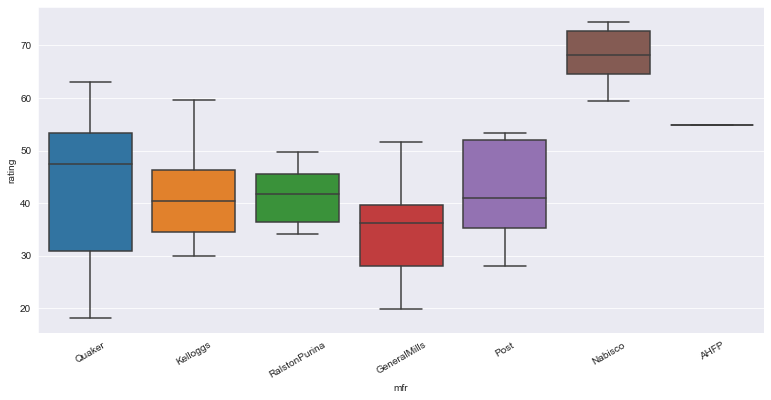

In [44]:
fig, ax = plt.subplots(figsize=(13,6))
sns.boxplot(data=df_processed, x = 'mfr', y = 'rating')
labels = ax.get_xticklabels()
ax.set_xticklabels(labels=labels, rotation = 30)

## Trend

While most brands tend to have a similar rating for their cereals,  
where 50 % of their cereals are rated between 30 and 50.  
  
  However, Nabisco stands out amongst all competitors with an average rating of 65.

### Ans 14

<AxesSubplot:>

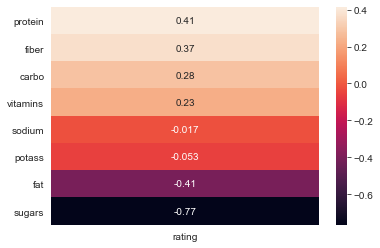

In [45]:
nutrients = df_processed[['protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','rating']]
nut_corr = nutrients.corr().loc[:,'rating'].sort_values(ascending = False)
nut_corr = pd.DataFrame(nut_corr)[1:]
sns.heatmap(nut_corr , annot = True)

### Correlations.

The highest correlations are observed with  
sugars -0.77  
protein 0.41  
fat    -0.41

<AxesSubplot:xlabel='sugars', ylabel='rating'>

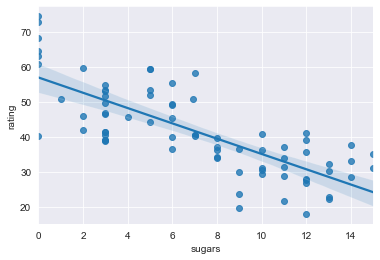

In [46]:
sns.regplot(data = nutrients , x = 'sugars' , y = 'rating')

<AxesSubplot:xlabel='protein', ylabel='rating'>

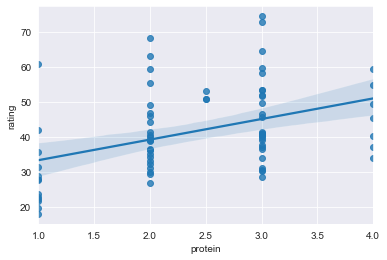

In [47]:
sns.regplot(data = nutrients , x = 'protein' , y = 'rating')

<AxesSubplot:xlabel='fat', ylabel='rating'>

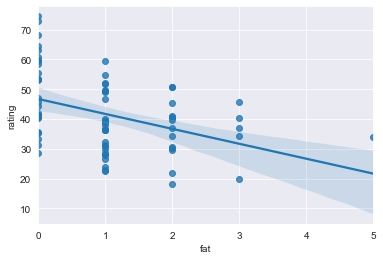

In [48]:
sns.regplot(data = nutrients , x = 'fat' , y = 'rating')

### Ans 15

In [49]:
## Creating Dataframe for Analysis
X = nutrients[['sugars','protein','fat']]
y = nutrients.pop('rating')

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [53]:
## scaling the dataset
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [62]:
## creating a model

model_lin_reg = LinearRegression()
model_lin_reg.fit(X_train, y_train)
score = model_lin_reg.score(X_test, y_test)

In [63]:
score = score*100
print("Accuracy Score is: %.2f%%" %score)

Accuracy Score is: 61.18%
